Analicemos primero de forma sencilla cuales serían unos valores para `s` y `S` ideales, para ellos definamos diferentes límites de estos valores, y hagamos un total de 30 simulaciones, y trabajemos con el promedio de dichas simulaciones, la variable que nos interesa es el dinero Final que gana la tienda

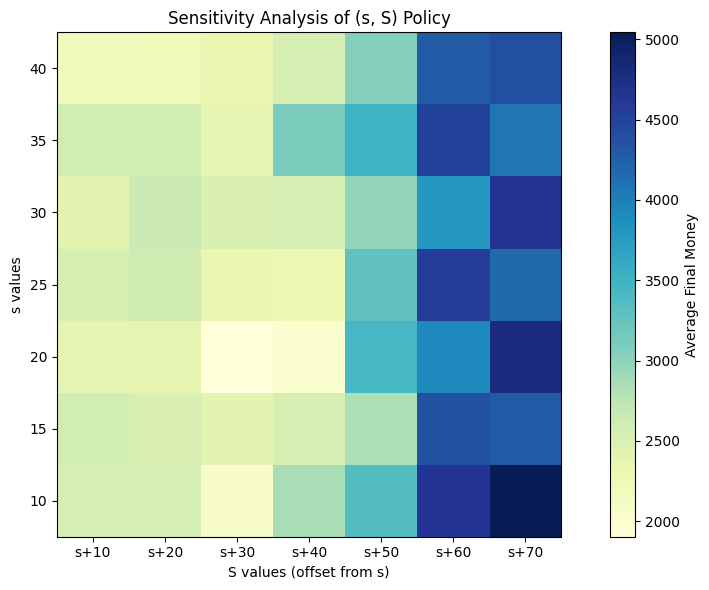

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import  inventory_simulation
from inventory import Inventory_Config
import matplotlib.pyplot as plt
import scipy.stats as stats

price_product = 100
refill_interval_product = 4
refill_cost_product = lambda product_cant: product_cant * price_product / 2
inventory_cost_product = lambda product_cant, y: product_cant * y / 100

demand_dist_product = lambda: np.random.randint(1, 5)
demand_dists = [demand_dist_product]
time_dist = lambda: np.random.exponential(8)

initial_money = 0
max_time = 24 * 7
total_simulations = 30

s_values = range(10, 41, 5)  # 10, 15, ..., 40
S_offsets = [10, 20, 30, 40, 50, 60, 70]  # S será s+10, s+20, etc.

results = []

for s in s_values:
    row = []
    for offset in S_offsets:
        S = s + offset
        config = Inventory_Config(price_product, s, S, refill_interval_product,
                                 refill_cost_product, inventory_cost_product)
        sims = [
            inventory_simulation(max_time, time_dist, [config], demand_dists, [S], initial_money)[1].money
            for _ in range(total_simulations)
        ]
        avg_money = np.mean(sims)
        row.append(avg_money)
    results.append(row)

results = np.array(results)

plt.figure(figsize=(10, 6))
im = plt.imshow(results, cmap="YlGnBu", origin='lower')

plt.colorbar(im, label="Average Final Money")
plt.xticks(ticks=range(len(S_offsets)), labels=[f"s+{o}" for o in S_offsets])
plt.yticks(ticks=range(len(s_values)), labels=[str(s) for s in s_values])
plt.xlabel("S values (offset from s)")
plt.ylabel("s values")
plt.title("Sensitivity Analysis of (s, S) Policy")
plt.tight_layout()
plt.show()


Usemos ahora dos pares (`s`,`S`) para analizarlos a ambos y compararlos más detalladamente, una primera simulación la haremos con `s`$=30$ y `S`$=80$ y la 2da simulación la efectuaremos con los valores `s`$=30$ y `S`$=100$

In [5]:

price_product = 100
refill_interval_product = 4
refill_cost_product = lambda product_cant: product_cant * price_product / 2
inventory_cost_product = lambda product_cant, y: product_cant * y / 100

s_product1 = 30
S_product1 = 80

s_product2 = 30
S_product2 = 100

config1 = Inventory_Config(price_product, s_product1, S_product1, refill_interval_product,
                                  refill_cost_product, inventory_cost_product)
config2 = Inventory_Config(price_product, s_product2, S_product2, refill_interval_product,
                                  refill_cost_product, inventory_cost_product)

demand_dist_product = lambda: np.random.randint(1, 5)
demand_dists = [demand_dist_product]

max_time = 24 * 7

time_dist = lambda: np.random.exponential(8)

initial_money = 0

total_simulations = 100
simulation1_results = []
simulation2_results = []

for i in range(total_simulations):
    _, state = inventory_simulation(max_time, time_dist, [config1], demand_dists, [S_product1], initial_money)
    simulation1_results.append(state.money)

    _, state = inventory_simulation(max_time, time_dist, [config2], demand_dists, [S_product2], initial_money)
    simulation2_results.append(state.money)
    
average1 = np.mean(simulation1_results)
average2 = np.mean(simulation2_results)	

print(f"Dinero promedio en la simulacion 1: {average1} with s={s_product1} and S={S_product1}")
print(f"Dinero promedio en la simulacion 2: {average2} with s={s_product2} and S={S_product2}")

Dinero promedio en la simulacion 1: 3357.82532456633 with s=30 and S=80
Dinero promedio en la simulacion 2: 4575.235917427431 with s=30 and S=100


In [7]:

std1 = np.std(simulation1_results)
std2 = np.std(simulation2_results)
var1 = np.var(simulation1_results)
var2 = np.var(simulation2_results)

print(f"Simulacion 1: Desviacion estandar = {std1:.2f}, Varianza = {var1:.2f}")
print(f"Simulacion 2: Desviacion estandar = {std2:.2f}, Varianza = {var2:.2f}")


Simulacion 1: Desviacion estandar = 1687.10, Varianza = 2846313.19
Simulacion 2: Desviacion estandar = 1373.78, Varianza = 1887273.74


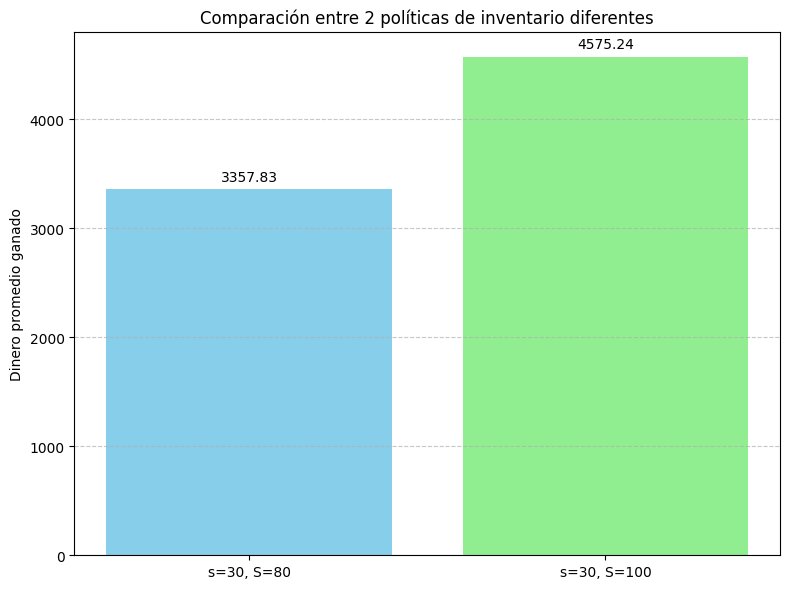

In [8]:

# Etiquetas para las dos configuraciones
labels = [f"s={s_product1}, S={S_product1}", f"s={s_product2}, S={S_product2}"]
averages = [average1, average2]

# Crear la figura
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, averages, color=["skyblue", "lightgreen"])

# Agregar los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f"{yval:.2f}", ha='center', va='bottom')

# Etiquetas y título
plt.ylabel("Dinero promedio ganado")
plt.title("Comparación entre 2 políticas de inventario diferentes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Analicemos ahora los intervalos de confianza

Intervalo de confianza para la simulacion 1: (3025.4935729998806, 3690.1570761327794)
Intervalo de confianza para la simulacion 2: (4304.623362050246, 4845.848472804615)


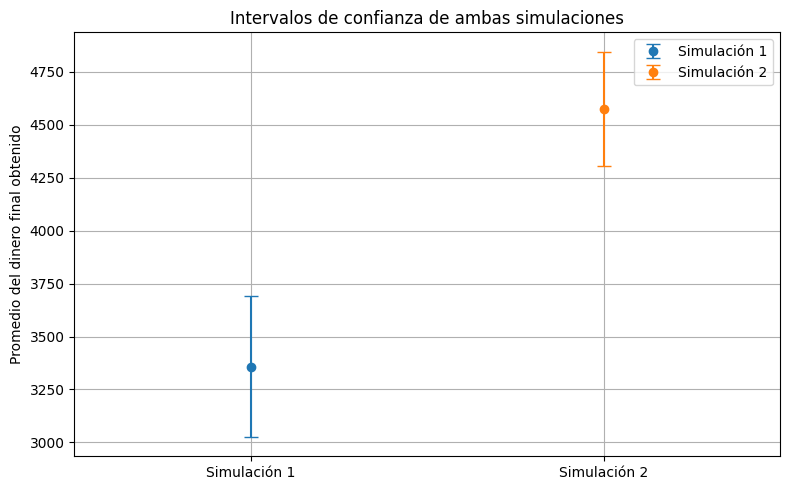

In [9]:

mean1 = np.mean(simulation1_results)
mean2 = np.mean(simulation2_results)
std1 = np.std(simulation1_results, ddof=1)
std2 = np.std(simulation2_results, ddof=1)
n = len(simulation1_results)
m = len(simulation2_results)
confidence = 0.95

# Confidence intervals
ci1 = stats.norm.interval(confidence, loc=mean1, scale=std1 / np.sqrt(n))
ci2 = stats.norm.interval(confidence, loc=mean2, scale=std2 / np.sqrt(m))
print(f"Intervalo de confianza para la simulacion 1: {ci1}")
print(f"Intervalo de confianza para la simulacion 2: {ci2}")

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot means with error bars representing CI
ax.errorbar(1, mean1, yerr=[[mean1 - ci1[0]], [ci1[1] - mean1]], fmt='o', label='Simulación 1', capsize=5)
ax.errorbar(2, mean2, yerr=[[mean2 - ci2[0]], [ci2[1] - mean2]], fmt='o', label='Simulación 2', capsize=5)

ax.set_xlim(0.5, 2.5)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Simulación 1', 'Simulación 2'])
ax.set_ylabel('Promedio del dinero final obtenido')
ax.set_title('Intervalos de confianza de ambas simulaciones')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

Analicemos ahora los intervalos de confianza de la diferencia entre sus medias,

Intervalos de confianza para la diferencia: (-1638.9855764229465,-795.835609299257)


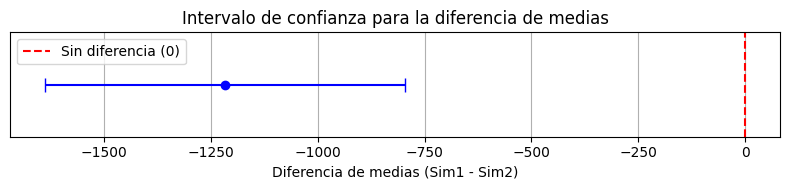

In [10]:


diff_mean = mean1 - mean2
data = [m - n for m,n in zip(simulation1_results, simulation2_results)]
mean = np.mean(data)
std = np.std(data)
alpha = 1 - confidence
tstat = stats.t.ppf(1-alpha/2, len(data) - 1)

error_margin = tstat * std / np.sqrt(len(data))
lbound = mean - error_margin
ubound = mean + error_margin

print(f"Intervalos de confianza para la diferencia: ({lbound},{ubound})")

fig, ax = plt.subplots(figsize=(8, 2))

# Línea horizontal con el IC
ax.errorbar(mean, 0, xerr=[[mean - lbound], [ubound - mean]], fmt='o', color='blue', capsize=5)

# Línea vertical en cero (referencia)
ax.axvline(0, color='red', linestyle='--', label='Sin diferencia (0)')

ax.set_title('Intervalo de confianza para la diferencia de medias')
ax.set_xlabel('Diferencia de medias (Sim1 - Sim2)')
ax.set_yticks([])
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

Ahora si los datos no siguen una distribución normal y la muestra es pequeña, los IC basados en distribución normal (como los que usé con `stats.norm.interval`) pueden no ser válidos, así que hagamos un test de normalidad a nuestros datos

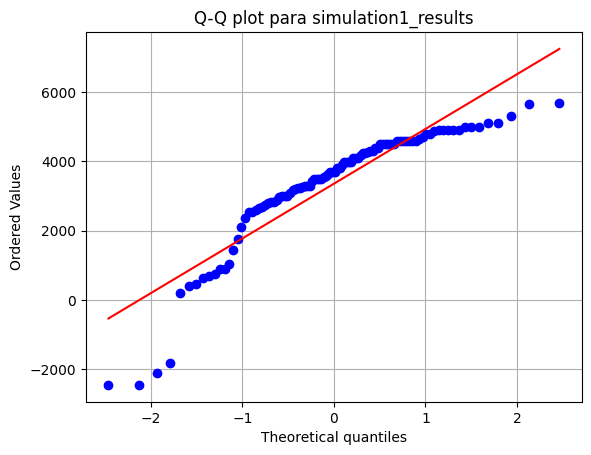

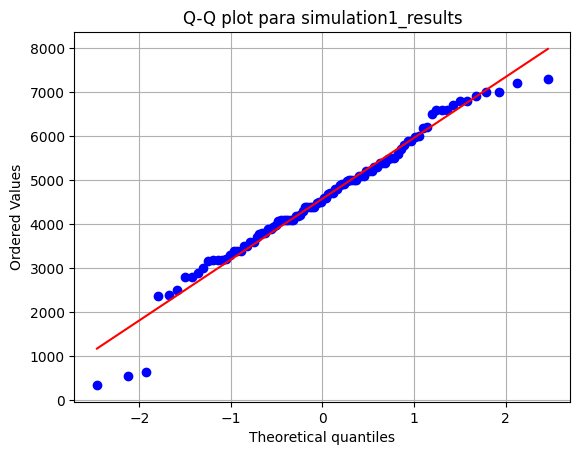

In [11]:


stats.probplot(simulation1_results, dist="norm", plot=plt)
plt.title("Q-Q plot para simulation1_results")
plt.grid(True)
plt.show()
stats.probplot(simulation2_results, dist="norm", plot=plt)
plt.title("Q-Q plot para simulation1_results")
plt.grid(True)
plt.show()


Bueno eso no se ve muy normal, hagamos un test de Shapiro-Wilk

In [13]:
from scipy.stats import shapiro

stat, p = shapiro(simulation1_results)
print(f"Shapiro-Wilk Test: p-value = {p}")

if p > 0.05:
    print("No se rechaza la normalidad (distribución posiblemente normal).")
else:
    print("Se rechaza la normalidad (distribución no normal).")


Shapiro-Wilk Test: p-value = 7.549018299357613e-09
Se rechaza la normalidad (distribución no normal).


Bueno, dado que nuestros datos no distribuyen normal, los IC obtenidos anteriormente no son completamente fiables, entonces hallemos nuestros intervalos de confianza mediante el método de bootstrap

Intervalo de confianza bootstrap para la diferencia de medias: (-1646.1060600239466, -800.6731563934459)


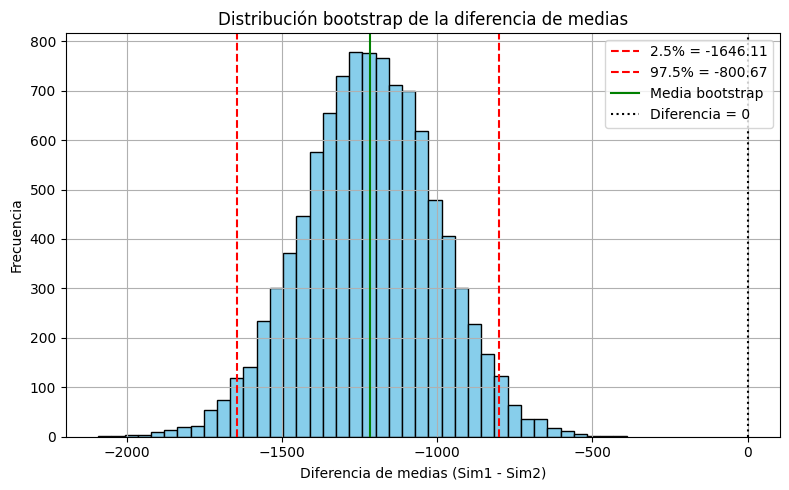

In [14]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.array(simulation1_results)
data2 = np.array(simulation2_results)

num_bootstrap = 10_000
boot_diffs = []
np.random.seed(42)

for _ in range(num_bootstrap):
    sample1 = np.random.choice(data1, size=len(data1), replace=True)
    sample2 = np.random.choice(data2, size=len(data2), replace=True)
    boot_diffs.append(np.mean(sample1) - np.mean(sample2))

# Intervalo de confianza del 95%
ci_lower = np.percentile(boot_diffs, 2.5)
ci_upper = np.percentile(boot_diffs, 97.5)

print(f"Intervalo de confianza bootstrap para la diferencia de medias: ({ci_lower}, {ci_upper})")

plt.figure(figsize=(8, 5))
plt.hist(boot_diffs, bins=40, color='skyblue', edgecolor='black')
plt.axvline(ci_lower, color='red', linestyle='--', label=f"2.5% = {ci_lower:.2f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"97.5% = {ci_upper:.2f}")
plt.axvline(np.mean(boot_diffs), color='green', linestyle='-', label='Media bootstrap')
plt.axvline(0, color='black', linestyle=':', label='Diferencia = 0')

plt.title("Distribución bootstrap de la diferencia de medias")
plt.xlabel("Diferencia de medias (Sim1 - Sim2)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Bueno aquí obtenemos el mismo resultado que ya teníamos antes, existe una evidencia de una diferencia estadísticamente significativa entre las políticas usadas en ambas simulaciones.